In [32]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

In [33]:
# Set the random seed for reproducibility
# Note: This is used for model prototyping, but it is good practice to comment this out and run multiple experiments to evaluate your model.
from numpy.random import seed

seed(1)
from tensorflow import random

random.set_seed(2)

In [34]:
#Import TSLA closing prices
csv_path = Path("TSLA-RNN.csv")
tsla_df = pd.read_csv(csv_path, parse_dates=True, index_col='Date', infer_datetime_format=True)
tsla_df = tsla_df.sort_index()
tsla_df.head()

,Close
Date,
2010-06-29 00:00:00,4.78
2010-06-30 16:00:00,4.77
2010-07-01 16:00:00,4.39
2010-07-02 16:00:00,3.84
2010-07-06 16:00:00,3.22


In [35]:
# Length of database
len(tsla_df)

2587

In [36]:
#Change to Year, Month and day time format
tsla_df.index = pd.to_datetime(tsla_df.index).date
tsla_df.head()

,Close
2010-06-29,4.78
2010-06-30,4.77
2010-07-01,4.39
2010-07-02,3.84
2010-07-06,3.22


In [13]:
#Iloc dataframe to aling w/twitter df
tsla_df = tsla_df.iloc[-1360:] 

In [14]:
#Confirm DF's length
len(tsla_df)

1360

In [13]:
#IMPORT Elon Muck's Tweets
url_2 = 'https://raw.githubusercontent.com/klleung72781/fintech_project_2/main/clean_twitter.csv'
twitter_df = pd.read_csv(url_2, parse_dates=True, index_col='Date', infer_datetime_format=True)
twitter_df = twitter_df.sort_index()

In [14]:
#Print DF
twitter_df.head()

,SENT
Date,
2015-01-30,1.00
2015-02-08,0.25
2015-02-10,0.00
2015-02-11,0.50
2015-02-12,0.00


In [15]:
#Confirm Df's alignment
len(twitter_df)

1360

In [16]:
#Change Twitter DF to Year, Month and day time format
twitter_df.index = pd.to_datetime(twitter_df.index).date
twitter_df.head()

,SENT
2015-01-30,1.00
2015-02-08,0.25
2015-02-10,0.00
2015-02-11,0.50
2015-02-12,0.00


In [17]:
#Creating a function to replace values in the SENT with (0,1,-1)
def encode(x):
    if x >= -1 and x < -0.5:
        return -1
    elif x >= -0.5 and x < 0.5:
        return 0
    else:
        return 1
twitter_df.SENT = twitter_df.SENT.apply(
    lambda x: encode(x)
)

In [19]:
#Check Tweets scores are now 1, 0, -1
twitter_df.head()

,SENT
2015-01-30,1
2015-02-08,0
2015-02-10,0
2015-02-11,1
2015-02-12,0


In [20]:
#Import Google trend/search data
csv_path = Path("SEARCH.csv")
search_df = pd.read_csv(csv_path, parse_dates=True, index_col='Date', infer_datetime_format=True)
search_df = search_df.sort_index()
search_df.head()

,TSLA_SEARCH
Date,
2010-07-01,7
2010-08-01,5
2010-09-01,5
2010-10-01,5
2010-11-01,5


In [21]:
#Check Tail
search_df.tail()

,TSLA_SEARCH
Date,
2020-06-01,51
2020-07-01,71
2020-08-01,70
2020-09-01,85
2020-10-01,63


In [22]:
#Concat Prices w/Twitter Sentiment & Search DF's
combo_df = pd.concat([twitter_df, tsla_df, search_df], axis=1)
combo_df.sample(10)

,SENT,Close,TSLA_SEARCH
2015-05-18,NaN,49.75,NaN
2019-03-20,0.0,54.72,NaN
2018-11-14,1.0,68.80,NaN
2018-03-26,0.0,60.84,NaN
2016-04-08,1.0,50.01,NaN
2017-04-19,NaN,61.10,NaN
2016-06-30,0.0,42.46,NaN
2018-06-18,0.0,74.17,NaN
2018-08-08,0.0,74.07,NaN
2020-02-09,0.0,NaN,NaN


In [23]:
#Change to Year, Month and day time format
combo_df.index = pd.to_datetime(combo_df.index).date
combo_df.head()

,SENT,Close,TSLA_SEARCH
2015-01-30,1.0,NaN,NaN
2015-02-08,0.0,NaN,NaN
2015-02-10,0.0,NaN,NaN
2015-02-11,1.0,NaN,NaN
2015-02-12,0.0,NaN,NaN


In [24]:
#Dropna
combo_df.dropna(inplace=True)
combo_df.head()

,SENT,Close,TSLA_SEARCH
2015-06-01,1.0,49.89,19.0
2016-03-01,0.0,37.27,26.0
2016-04-01,1.0,47.52,54.0
2016-06-01,1.0,43.91,24.0
2016-08-01,1.0,46.00,22.0


In [25]:
#Check DF
combo_df.tail()

,SENT,Close,TSLA_SEARCH
2019-11-01,1.0,62.66,100.0
2020-04-01,1.0,96.31,37.0
2020-05-01,0.0,140.26,45.0
2020-06-01,0.0,179.62,51.0
2020-07-01,1.0,223.93,71.0


In [37]:
#THIS RUN IS ONLY TSLA CLOSING PRICES, TSLA_DF
def window_data(tsla_df, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(tsla_df) - window):
        features = tsla_df.iloc[i : (i + window), feature_col_number]
        target = tsla_df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [38]:
# Creating the features (X) and target (y) data using the window_data() function. (THIS RUN IS TSLA CLOSING PRICES ONLY-TSLA_DF)
window_size = 5

feature_column = 0
target_column = 0
X, y = window_data(tsla_df, window_size, feature_column, target_column)
print (f"X sample values:\n{X[:5]} \n")
print (f"y sample values:\n{y[:5]}")

X sample values:
[[4.78 4.77 4.39 3.84 3.22]
 [4.77 4.39 3.84 3.22 3.16]
 [4.39 3.84 3.22 3.16 3.49]
 [3.84 3.22 3.16 3.49 3.48]
 [3.22 3.16 3.49 3.48 3.41]] 

y sample values:
[[3.16]
 [3.49]
 [3.48]
 [3.41]
 [3.63]]


In [39]:
# Use 70% of the data for training and the remainder for testing
split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

In [40]:
# Use the MinMaxScaler to scale data between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [41]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print (f"X_train sample values:\n{X_train[:5]} \n")
print (f"X_test sample values:\n{X_test[:5]}")

X_train sample values:
[[[0.00327167]
  [0.00325147]
  [0.00248405]
  [0.00137329]
  [0.00012117]]

 [[0.00325147]
  [0.00248405]
  [0.00137329]
  [0.00012117]
  [0.        ]]

 [[0.00248405]
  [0.00137329]
  [0.00012117]
  [0.        ]
  [0.00066645]]

 [[0.00137329]
  [0.00012117]
  [0.        ]
  [0.00066645]
  [0.00064626]]

 [[0.00012117]
  [0.        ]
  [0.00066645]
  [0.00064626]
  [0.00050489]]] 

X_test sample values:
[[[0.13736974]
  [0.13716778]
  [0.13482511]
  [0.13278536]
  [0.13522902]]

 [[0.13716778]
  [0.13482511]
  [0.13278536]
  [0.13522902]
  [0.13232087]]

 [[0.13482511]
  [0.13278536]
  [0.13522902]
  [0.13232087]
  [0.14052024]]

 [[0.13278536]
  [0.13522902]
  [0.13232087]
  [0.14052024]
  [0.14013652]]

 [[0.13522902]
  [0.13232087]
  [0.14052024]
  [0.14013652]
  [0.14155021]]]


In [42]:
# Import required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [43]:
# Define the LSTM RNN model.
model = Sequential()

number_units = 5
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [44]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [45]:
# Summarize the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 5, 5)              140       
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5)              0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 5, 5)              220       
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5)              0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 5)                 220       
_________________________________________________________________
dropout_5 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [46]:
# Train the model
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=1, verbose=1)

Epoch 1/10
1807/1807 [==============================] - 7s 4ms/step - loss: 2.4634e-05
Epoch 2/10
1807/1807 [==============================] - 6s 3ms/step - loss: 1.3374e-04
Epoch 3/10
1807/1807 [==============================] - 5s 3ms/step - loss: 1.4802e-04
Epoch 4/10
1807/1807 [==============================] - 6s 3ms/step - loss: 1.5587e-04
Epoch 5/10
1807/1807 [==============================] - 6s 3ms/step - loss: 1.5894e-04
Epoch 6/10
1807/1807 [==============================] - 5s 3ms/step - loss: 1.5838e-04
Epoch 7/10
1807/1807 [==============================] - 5s 3ms/step - loss: 1.5826e-04
Epoch 8/10
1807/1807 [==============================] - 5s 3ms/step - loss: 1.5754e-04
Epoch 9/10
1807/1807 [==============================] - 5s 3ms/step - loss: 1.6029e-04
Epoch 10/10
1807/1807 [==============================] - 5s 3ms/step - loss: 1.5867e-04


In [47]:
# Evaluate the model
model.evaluate(X_test, y_test)

25/25 [==============================] - 0s 3ms/step - loss: 0.0362


0.036208122968673706

In [48]:
# Make some predictions
predicted = model.predict(X_test)

In [49]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [50]:
#Predicted Prices
predicted_prices

array([[70.27122 ],
       [70.27124 ],
       [70.271194],
       [70.271126],
       [70.27106 ],
       [70.270966],
       [70.27089 ],
       [70.27081 ],
       [70.27079 ],
       [70.27081 ],
       [70.27087 ],
       [70.27097 ],
       [70.2711  ],
       [70.271194],
       [70.27126 ],
       [70.27131 ],
       [70.27133 ],
       [70.27133 ],
       [70.27131 ],
       [70.27125 ],
       [70.27119 ],
       [70.27114 ],
       [70.27117 ],
       [70.27118 ],
       [70.27117 ],
       [70.27115 ],
       [70.27114 ],
       [70.27114 ],
       [70.27115 ],
       [70.27113 ],
       [70.27113 ],
       [70.271164],
       [70.27125 ],
       [70.27132 ],
       [70.2714  ],
       [70.27147 ],
       [70.27153 ],
       [70.27158 ],
       [70.27157 ],
       [70.27157 ],
       [70.27165 ],
       [70.27174 ],
       [70.27181 ],
       [70.271835],
       [70.27184 ],
       [70.27184 ],
       [70.27185 ],
       [70.27181 ],
       [70.27179 ],
       [70.27177 ],


In [51]:
# Create a DataFrame of Real and Predicted values (TSLA Closing PRICES ONLY)
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
    }, index = tsla_df.index[-len(real_prices): ])
stocks.head()

,Real,Predicted
2017-09-08,68.68,70.271217
2017-09-11,72.74,70.271240
2017-09-12,72.55,70.271194
2017-09-13,73.25,70.271126
2017-09-14,75.53,70.271057


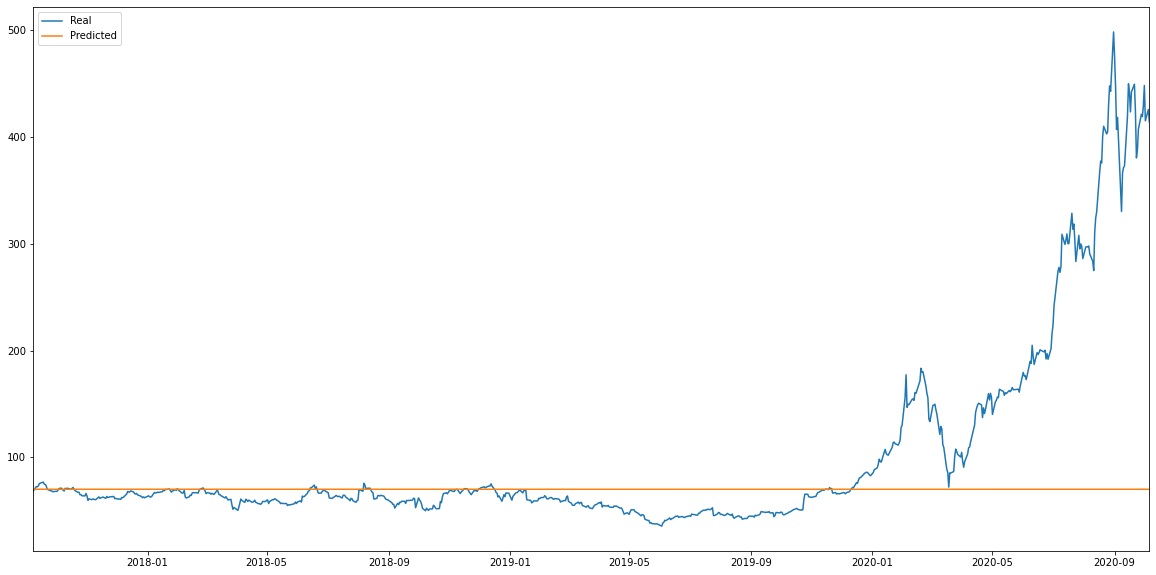

In [52]:
# Plot the real vs predicted prices as a line chart
stocks.plot(figsize=(20,10))